In [31]:
import plottingtools as pt
import numpy as np
%matplotlib inline

In [32]:
def get_subject_object(svo_triplet):
    return svo_triplet.split()[::2]

In [48]:
sv = {
    'human being groomed': np.array((1.75, -0.25)),
    'dog being groomed': np.array((0.5, 2.5)),
    'human grooming': np.array((1.75, 0.75)),
    'dog grooming': np.array((-1, 1)),
}

subject_object_pairs = [
    ('human', 'dog'),
    ('human', 'human'),
    ('dog', 'dog'),
]
svo = {
    "{} grooming {}".format(s, o): sv['{} grooming'.format(s)] + sv['{} being groomed'.format(o)]
                                         for s, o in subject_object_pairs
}

In [49]:
x = [v[0] for v in sv.values()]
y = [v[1] for v in sv.values()]
labels = ["\n".join(k.split()) for k in sv.keys()]
vectors = [[(0, v[i]) for v in sv.values()] for i in (0, 1)]
x_svo = [v[0] for v in svo.values()]
y_svo = [v[1] for v in svo.values()]
labels_svo = ["\n".join(k.split()) for k in svo.keys()]
#vectors_svo = [[(vec, v[i]) for v in svo.values()] for i in (0, 1)]
vectors_svo = [[], []]
for svo_triplet, end in svo.items():
    print(svo_triplet)
    s, o = get_subject_object(svo_triplet)
    print('  ', s, o)
    for pair in zip((s, o), ('grooming', 'being groomed')):
        print(pair)
        start = sv['{0[0]} {0[1]}'.format(pair)]
        print(start, end)
        for i in (0, 1):
            vectors_svo[i].append((start[i], end[i]))

human grooming dog
   human dog
('human', 'grooming')
[1.75 0.75] [2.25 3.25]
('dog', 'being groomed')
[0.5 2.5] [2.25 3.25]
human grooming human
   human human
('human', 'grooming')
[1.75 0.75] [3.5 0.5]
('human', 'being groomed')
[ 1.75 -0.25] [3.5 0.5]
dog grooming dog
   dog dog
('dog', 'grooming')
[-1  1] [-0.5  3.5]
('dog', 'being groomed')
[0.5 2.5] [-0.5  3.5]


(-2, 4.5) (0, 0)
(0, 0) (-1.25, 4.5)


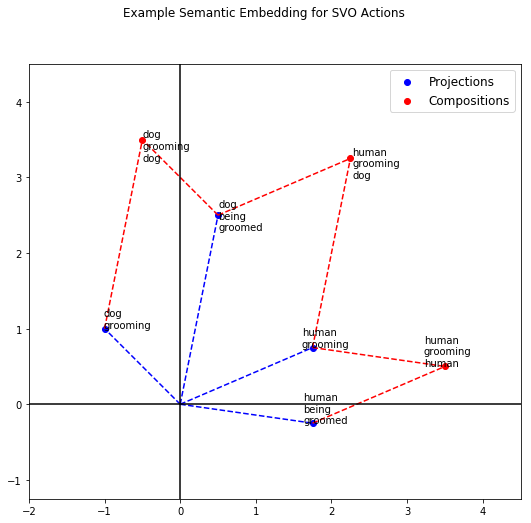

In [50]:

xlim = (min(min(x), min(x_svo)) - 1, max(max(x), max(x_svo)) + 1)
ylim = (min(min(y), min(y_svo)) - 1, max(max(y), max(x_svo)) + 1)
axis_lines = [((xlim[0], xlim[1]), (0, 0)), ((0, 0), (ylim[0], ylim[1]))]
plot = pt.Scatter(x=x,
                  y=y,        
                  labels=labels,
                  xlim=xlim,
                  ylim=ylim,
                  color='b',
                  title='Example Semantic Embedding for SVO Actions')
plot.plot(x=x_svo,
          y=y_svo,
          labels=labels_svo,
          color='r')

for xv, yv in zip(*vectors):
    plot.line(xv, yv, '--b')
for xv, yv in zip(*vectors_svo):
    plot.line(xv, yv, '--r')
    
#vectors_svo = [[(v_1[i], v_2[i]) for v_1]]
for line in axis_lines:
    print(line[0], line[1])
    plot.line(line[0], line[1], '-k')
              
plot._ax.set_aspect('equal')
plot.set_legend(labels=('Projections', 'Compositions'))
#plot.show()
plot.save()

In [44]:
pt.close_all()

In [15]:
axis_lines

[(-2, 7, 0, 0), (0, 0, -2, 7)]

In [16]:
plot._data